In [1]:
from generate_fragments import generate_fragments
from Multi_Nuclei_Segmentation import create_images, optimise_regions, multi_segmentation
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm

7it [00:00, 162.80it/s]


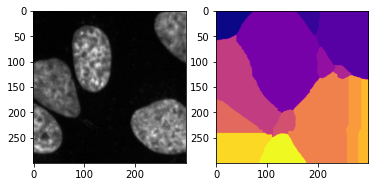

In [3]:
image = plt.imread('../images/dna-images/gnf/dna-1.png')[200:500, 200:500 ,0]   
Omega,S = generate_fragments(image,16,0.01,20,2,100)

fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(image, cmap = 'gray')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(Omega,cmap='plasma')

In [4]:
Z = list(S)
ListOfCoords = create_images(Omega, Z)
len(Z)

24

In [6]:
output = optimise_regions(image, ListOfCoords)

[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-3)]: Done   6 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-3)]: Done  13 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-3)]: Done  16 out of  24 | elapsed:   11.0s remaining:    5.4s
[Parallel(n_jobs=-3)]: Done  19 out of  24 | elapsed:   12.4s remaining:    3.2s
[Parallel(n_jobs=-3)]: Done  22 out of  24 | elapsed:   14.9s remaining:    1.3s
[Parallel(n_jobs=-3)]: Done  24 out of  24 | elapsed:   16.2s finished


In [9]:
output

((<6x1 matrix, tc='d'>,
  <6x1 matrix, tc='d'>,
  <6x1 matrix, tc='d'>,
  <6x1 matrix, tc='d'>,
  <6x1 matrix, tc='d'>,
  <6x1 matrix, tc='d'>,
  <6x1 matrix, tc='d'>,
  <6x1 matrix, tc='d'>,
  <6x1 matrix, tc='d'>,
  <6x1 matrix, tc='d'>,
  <6x1 matrix, tc='d'>,
  <6x1 matrix, tc='d'>,
  <6x1 matrix, tc='d'>,
  <6x1 matrix, tc='d'>,
  <6x1 matrix, tc='d'>,
  <6x1 matrix, tc='d'>,
  <6x1 matrix, tc='d'>,
  <6x1 matrix, tc='d'>,
  <6x1 matrix, tc='d'>,
  <6x1 matrix, tc='d'>,
  <6x1 matrix, tc='d'>,
  <6x1 matrix, tc='d'>,
  <6x1 matrix, tc='d'>,
  <6x1 matrix, tc='d'>),
 (113.16563891037121,
  inf,
  1086.607522334432,
  5162.572789320141,
  339.4013040160438,
  -0.3060947187817379,
  1086.6069733151835,
  524.832835512739,
  832.1415948286254,
  940.4964136840681,
  inf,
  inf,
  inf,
  519.3336076492652,
  39.210077446073456,
  180.06475799399746,
  3.0608453556016145e-07,
  inf,
  1086.6063191556116,
  inf,
  7040.8879795748635,
  1683.6714270010784,
  579.1974765573991,
  inf))

In [ ]:
seg = multi_segmentation(image, Omega, list(S), f, np.median(f), theta)

In [ ]:
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)

for ellipse in seg:
    for contour in ellipse:
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
plt.axis('off')
plt.savefig('../images/segmented/dna-3.jpg', bbox_inches = 'tight')

In [ ]:
for i in tqdm(range(2,50)):
    image = plt.imread('../images/dna-images/gnf/dna-' + str(i) + '.png')[...,0]
    Omega,S = generate_fragments(image,16,0.01,20,2,100)
    Z = list(S)
    ListOfCoords = create_images(Omega, Z)
    theta, f = optimise_fragments(image, ListOfCoords)
    seg = multi_segmentation(image, Omega, list(S), f, np.median(f), theta)
    fig, ax = plt.subplots()
    ax.imshow(image, cmap=plt.cm.gray)
    for ellipse in seg:
        for contour in ellipse:
            ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
    plt.axis('off')
    plt.savefig('../images/segmented/dna-' + str(i) + '.png', bbox_inches = 'tight')